In [1]:
using PyPlot
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [2]:
"""plot line w*x+b=0"""
function plotline(w::Array{Float64,1},b::Number;
                  xmin=-100,xmax=100, 
                  label = "",
                  format = "")
    x1samples = [xmin, xmax]
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[1]*x1samples)/w[2]
    if format==""
        plot(x1samples, x2samples, label=label)
    else
        plot(x1samples, x2samples, format, label=label)
    end
end

plotline

In [3]:
# Generate and plot data
srand(5)
color = ["b", "r", "c", "m"]
shape = ["o", "d", "^", "s"]
n = 20
function sample_data(num_points; noise=1)
    X1 = randn(n,2)*noise .+ [4 0]
    y1 = fill(1,n)
    X2 = randn(n,2)*noise .+ [-3 3]
    y2 = fill(2,n)
    X3 = randn(n,2)*noise .+ [-3 -3]
    y3 = fill(3,n)    
    return vcat(X1,X2,X3), vcat(y1,y2,y3)
end
X,y = sample_data(n)

(
[5.46431 -0.520668; 4.26087 1.16752; … ; -5.10819 -4.34591; -2.03411 -4.41537],

[1,1,1,1,1,1,1,1,1,1  …  3,3,3,3,3,3,3,3,3,3])

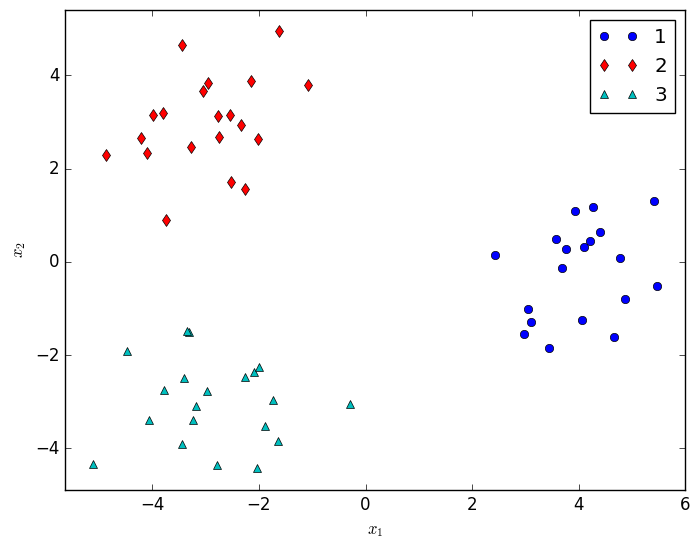

PyObject <matplotlib.legend.Legend object at 0x328a7f3d0>

In [4]:
"""function to plot the above data"""
function plotdata(X=X,y=y; margin=.05)
    hold(true)
    plot(X[y.==1,1],X[y.==1,2], color[1]*shape[1],label="1")
    plot(X[y.==2,1],X[y.==2,2], color[2]*shape[2],label="2")
    plot(X[y.==3,1],X[y.==3,2], color[3]*shape[3],label="3")            
    xlabel(L"x_1")
    ylabel(L"x_2")
    range_y = maximum(X[:,2]) - minimum(X[:,2])
    range_x = maximum(X[:,1]) - minimum(X[:,1])
    ylim([minimum(X[:,2])-margin*range_y,maximum(X[:,2])+margin*range_y])
    xlim([minimum(X[:,1])-margin*range_x,maximum(X[:,1])+margin*range_x])
end
plotdata()
legend()
# savefig("nominal_data.pdf")

In [5]:
function plot_imputed(l::Loss, X, w, color, shape)
    yhat = impute([l], X*w)
    for i=1:length(y)
        plot(X[i,1], X[i,2], color[yhat[i]]*shape[yhat[i]], alpha=.1)
    end
end

  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/madeleine/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
i

plot_imputed (generic function with 1 method)

# One-vs-All Hinge Loss

In [6]:
n = length(y)
Xoffset = [X ones(n)]
loss = OvALoss(3, bin_loss = HingeLoss())
scale!(loss, 1/n)
w_ova = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=2000)

3×3 Array{Float64,2}:
  3.29678      -0.873691  -0.935691
  0.000337219   2.12708   -2.0498  
 -0.333333     -0.752038  -0.857172

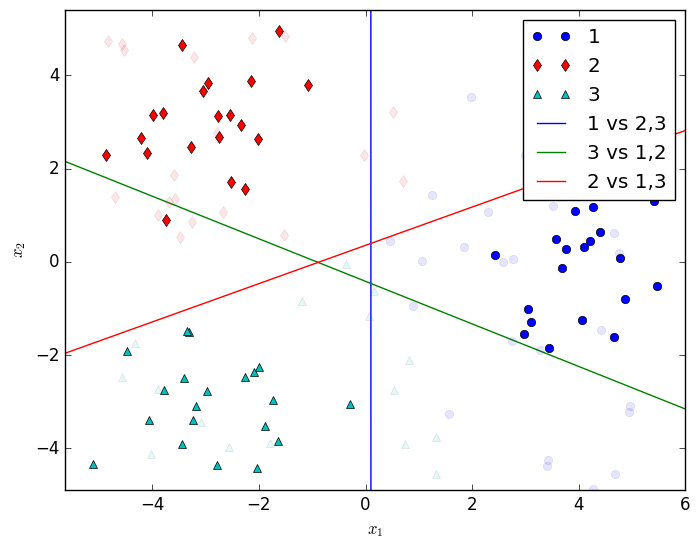

PyObject <matplotlib.legend.Legend object at 0x32ba91c50>

In [7]:
# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_ova[1:2,1], w_ova[3,1], label="1 vs 2,3")
plotline(w_ova[1:2,3], w_ova[3,3], label="3 vs 1,2")
plotline(w_ova[1:2,2], w_ova[3,2], label="2 vs 1,3")
ntest = 1000
Xtest = [10*rand(ntest,2)-5 ones(ntest)]
plot_imputed(loss, Xtest, w_ova, color, shape)
legend()
# savefig("ova.pdf")

# multinomial logit

In [8]:
Xoffset = [X ones(n)]
loss = MultinomialLoss(3)
scale!(loss, 1/n)
w_mnl = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=200)

3×3 Array{Float64,2}:
 1.78402     -0.959858   -0.824164 
 0.00230755   1.65834    -1.66065  
 0.0369048    0.0229549  -0.0598597

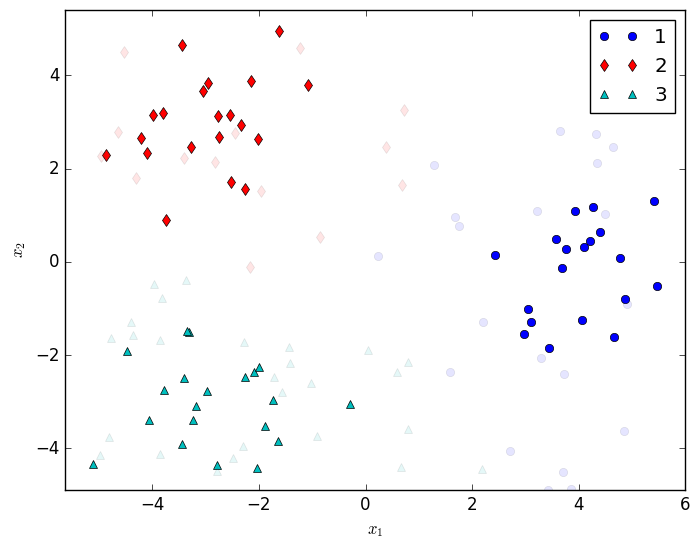

PyObject <matplotlib.legend.Legend object at 0x32c06d110>

In [9]:
# plot the fit
clf() # clears the previous figure
plotdata()
ntest = 1000
Xtest = [10*rand(ntest,2)-5 ones(ntest)]
plot_imputed(loss, Xtest, w_mnl, color, shape)
legend()
# savefig("mnl.pdf")

# Ordinal data

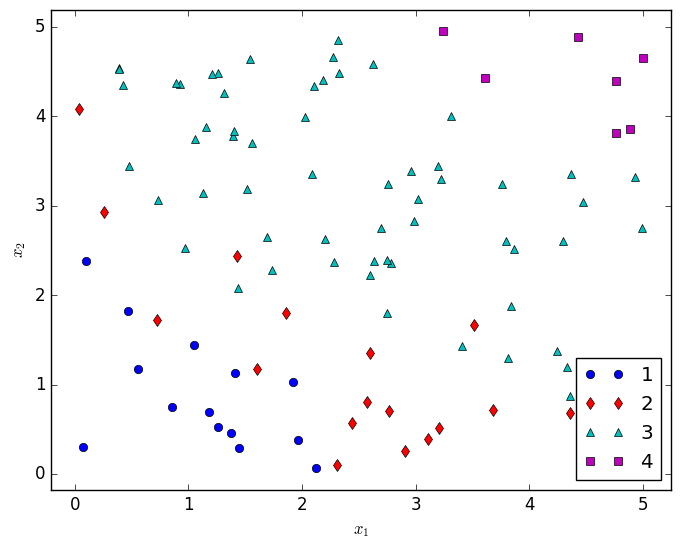

PyObject <matplotlib.legend.Legend object at 0x32c323450>

In [10]:
# Generate and plot data
srand(1)
n = 100
function sample_ord_data(num_points, num_levels; noise=.05)
    X = 5rand(num_points, 2)   
    w♮ = rand(2)
    z = X*w♮
    znorm = z - minimum(z)
    znorm = znorm / maximum(znorm)
    b = [.25, .4, .8]
    y = sum(znorm + noise*randn(num_points) .>= b', 2) + 1
    return X,vec(y)
end
X,y = sample_ord_data(n, 4)

"""function to plot the above data"""
function plot_ord_data(X=X,y=y; margin=.05)
    hold(true)
    for i=1:4
        plot(X[y.==i,1],X[y.==i,2], color[i]*shape[i],label="$i")
    end
    xlabel(L"x_1")
    ylabel(L"x_2")
    range_y = maximum(X[:,2]) - minimum(X[:,2])
    range_x = maximum(X[:,1]) - minimum(X[:,1])
    ylim([minimum(X[:,2])-margin*range_y,maximum(X[:,2])+margin*range_y])
    xlim([minimum(X[:,1])-margin*range_x,maximum(X[:,1])+margin*range_x])
end
plot_ord_data()
legend(loc=4)
# savefig("ord_data.pdf")

# Ordinal Hinge Loss

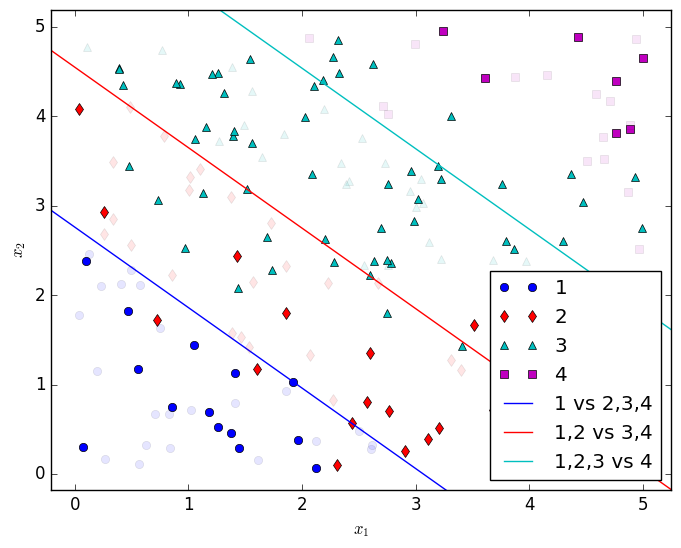

w_ordhinge = [0.503239,0.559206,-0.0434301]


PyObject <matplotlib.legend.Legend object at 0x32c781110>

In [11]:
Xoffset = [X ones(n)]
loss = OrdinalHingeLoss(1,4)
scale!(loss, 1/n)
w_ordhinge = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=200)
@show w_ordhinge

# plot the fit
clf() # clears the previous figure
plot_ord_data()
plotline(w_ordhinge[1:2], w_ordhinge[3] - 1.5, format=color[1], label="1 vs 2,3,4")
plotline(w_ordhinge[1:2], w_ordhinge[3] - 2.5, format=color[2], label="1,2 vs 3,4")
plotline(w_ordhinge[1:2], w_ordhinge[3] - 3.5, format=color[3], label="1,2,3 vs 4")
ntest = 1000
Xtest = [5*rand(ntest,2) ones(ntest)]
plot_imputed(loss, Xtest, reshape(w_ordhinge, (3,1)), color, shape)
legend(loc=4)
# savefig("ord_hinge.pdf")

In [12]:
# Bigger vs Smaller Loss

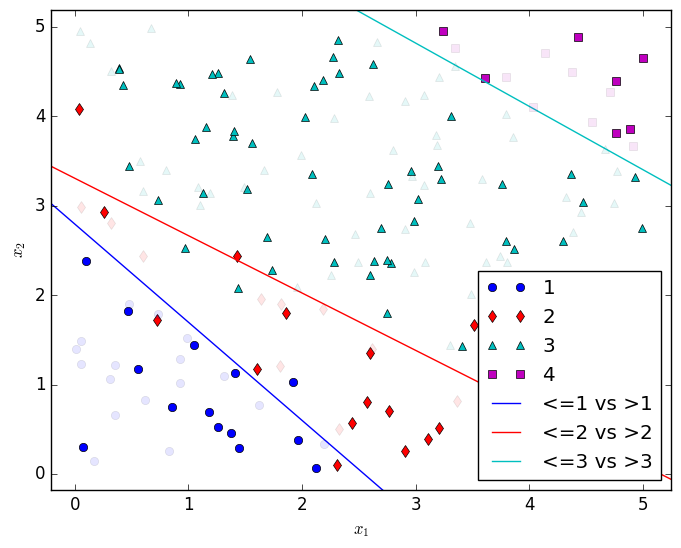

3×3 Array{Float64,2}:
   4.96305    2.44358    2.39082
   4.52139    3.80888    3.37804
 -12.6342   -12.5941   -23.4466 

In [13]:
Xoffset = [X ones(n)]
loss = BvSLoss(4, bin_loss=LogisticLoss())
scale!(loss, 1/n)
w_bvs = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=5000)

# plot the fit
clf() # clears the previous figure
plot_ord_data()
for i=1:3
    plotline(w_bvs[1:2,i], w_bvs[3,i], format=color[i], label="<=$i vs >$i")
end
ntest = 500
Xtest = [5*rand(ntest,2) ones(ntest)]
plot_imputed(loss, Xtest, w_bvs, color, shape)
legend(loc=4)
# savefig("bvs_zeroreg.pdf")
w_bvs

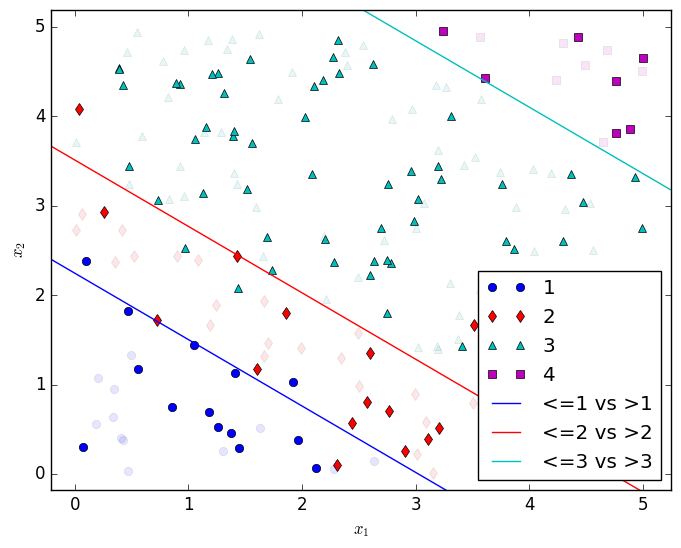

3×3 Array{Float64,2}:
  2.44497    2.44497    2.44497
  3.29251    3.29251    3.29251
 -7.39197  -11.5585   -23.2829 

In [14]:
Xoffset = [X ones(n)]
loss = BvSLoss(4, bin_loss=LogisticLoss())
scale!(loss, 1/n)
w_bvs = proxgrad(loss, OrdinalReg(), Xoffset, y, stepsize=1, maxiters=5000)

# plot the fit
clf() # clears the previous figure
plot_ord_data()
for i=1:3
    plotline(w_bvs[1:2,i], w_bvs[3,i], format=color[i], label="<=$i vs >$i")
end
ntest = 500
Xtest = [5*rand(ntest,2) ones(ntest)]
plot_imputed(loss, Xtest, w_bvs, color, shape)
legend(loc=4)
# savefig("bvs_ordinalreg.pdf")
w_bvs